<a href="https://colab.research.google.com/github/lc2232/InteriorSegmentor/blob/main/InteriorNet_Segmentor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

# Install PyTorch
!pip install torch==1.12.0 torchvision --extra-index-url https://download.pytorch.org/whl/cu113
# Install MMCV
!pip install openmim
!mim install mmcv-full==1.6.0

!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 13942, done.
remote: Counting objects: 100% (19/19), done.
re

In [ ]:
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoints
# !wget https://conversationhub.blob.core.windows.net/beit-share-public/beit/beit_base_patch16_224_pt22k_ft22k.pth -P checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x512_160k_ade20k/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth -P checkpoints
# !python /content/mmsegmentation/tools/model_converters/beit2mmseg.py https://conversationhub.blob.core.windows.net/beit-share-public/beit/beit_base_patch16_224_pt22k_ft22k.pth pretrain/beit_base_patch16_224_pt22k_ft22k.pth

# !python tools/model_converters/vit2mmseg.py https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-vitjx/jx_vit_base_p16_224-80ecf9dd.pth pretrain/jx_vit_base_p16_224-80ecf9dd.pth

--2023-03-13 15:09:52--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.209, 8.48.85.207, 8.48.85.214, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  29.7MB/s    in 6.1s    

2023-03-13 15:09:58 (30.7 MB/s) - ‘checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]

--2023-03-13 15:09:58--  https://download.openmmlab.com/mmsegmentation/v0.5/resnest/deeplabv3plus_s101-d8_512x512_160k_ade20k/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth
R

In [ ]:

!mkdir dataset
!cp /content/drive/MyDrive/Interior/subset.zip /content/mmsegmentation/dataset/
!ls
!unzip /content/mmsegmentation/dataset/subset.zip -d /content/mmsegmentation/dataset/

# FILES=/content/mmsegmentation/dataset/*

# for f in $FILES
# do
# if [[ "$f" != *\.zip ]]
# then
#   unzip f -d /content/mmsegmentation/dataset/
# fi
# done

checkpoints   docker	   mmseg		    README.md	      setup.cfg
CITATION.cff  docs	   mmsegmentation.egg-info  README_zh-CN.md   setup.py
configs       LICENSE	   model-index.yml	    requirements      tests
dataset       LICENSES.md  projects		    requirements.txt  tools
demo	      MANIFEST.in  pytest.ini		    resources
Archive:  /content/mmsegmentation/dataset/subset.zip
   creating: /content/mmsegmentation/dataset/subset/
  inflating: /content/mmsegmentation/dataset/subset/.DS_Store  
  inflating: /content/mmsegmentation/dataset/__MACOSX/subset/._.DS_Store  
  inflating: /content/mmsegmentation/dataset/subset/cocolabel.json  
   creating: /content/mmsegmentation/dataset/subset/label/
   creating: /content/mmsegmentation/dataset/subset/cam/
  inflating: /content/mmsegmentation/dataset/subset/label/8_nyu.png  
  inflating: /content/mmsegmentation/dataset/subset/label/1_nyu.png  
  inflating: /content/mmsegmentation/dataset/subset/label/12_nyu.png  
  inflating: /content/mmsegmentation/dat

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: checkpoints/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth
['wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator', 'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 'otherstructure', 'otherfurniture', 'otherprop']
40
150


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


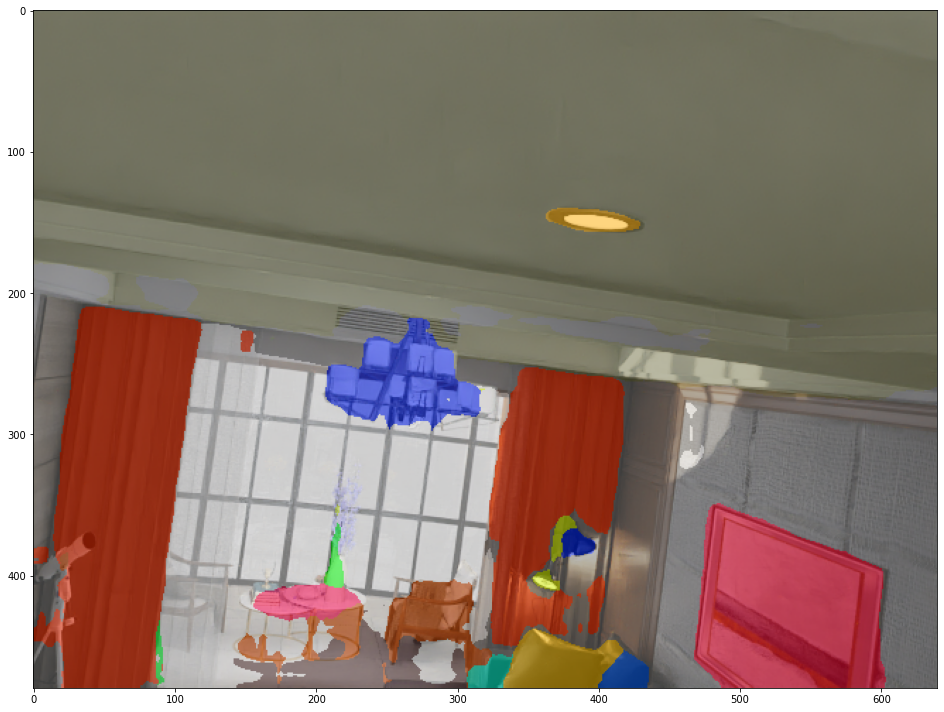

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

import json

# config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
# checkpoint_file = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

config_file = 'configs/resnest/deeplabv3plus_s101-d8_512x512_160k_ade20k.py'
checkpoint_file = 'checkpoints/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth'

# config_file = '/content/mmsegmentation/configs/beit/upernet_beit-base_640x640_160k_ade20k_ms.py'
# config_file = 'upernet_beit-base_8x2_640x640_160k_ade20k.py'
# checkpoint_file = '/content/mmsegmentation/pretrain/beit_base_patch16_224_pt22k_ft22k.pth'

# config_file = '/content/mmsegmentation/configs/vit/upernet_deit-b16_512x512_80k_ade20k.py'
# checkpoint_file = '/content/mmsegmentation/pretrain/jx_vit_base_p16_224-80ecf9dd.pth'

# # build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

# # test a single image
img = '/content/mmsegmentation/dataset/subset/cam/0.png'
result = inference_segmentor(model, img)

f = open('/content/mmsegmentation/dataset/subset/cocolabel.json')

# returns JSON object as 
# a dictionary
coco_label = json.load(f)

f.close()

classes = []

for category in coco_label['categories']:
  classes.append(category["name"])

print(classes)
print(len(classes))

palette = [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
               [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
               [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
               [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
               [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
               [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
               [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
               [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
               [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
               [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
               [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
               [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
               [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
               [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
               [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
               [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
               [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
               [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
               [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
               [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
               [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
               [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
               [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
               [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
               [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
               [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
               [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
               [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
               [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
               [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
               [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
               [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
               [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
               [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
               [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
               [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
               [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
               [102, 255, 0], [92, 0, 255]]

print(len(get_palette('ade20k')))


for i in range(0, (len(palette) - 40) ):
    palette.pop()

# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))

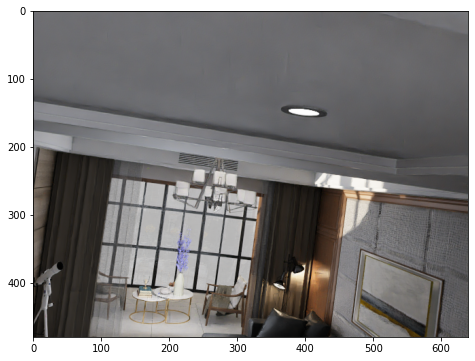

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/mmsegmentation/dataset/subset/cam/0.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import json

data_root = '/content/mmsegmentation/dataset/subset/'
img_dir = 'cam/'
ann_dir = 'label/'

# get all the labels from a folders cocolabel.json and put them into a list

# Opening JSON file

# split train/val sets randomly

split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))

filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, img_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

# implement load_annotations funciton in the new dataset class

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class InteriorNetDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='_nyu.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config
cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed
from mmseg.utils import get_device

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = len(classes)
cfg.model.auxiliary_head.num_classes = len(classes)

# Modify dataset type and path
cfg.dataset_type = 'InteriorNetDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (320, 240)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.runner.max_iters = 1000
cfg.log_config.interval = 50
cfg.evaluation.interval = 250
cfg.checkpoint_config.interval = 500

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = get_device()

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnest101',
    backbone=dict(
        type='ResNeSt',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True,
        stem_channels=128,
        radix=2,
        reduction_factor=4,
        avg_down_stride=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        dilations=(1, 12, 24, 36),
        c1_in_channels=256,
        c1_channels=48,
        dropout_ratio=0.1,
        num_classes=40,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_we

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
# model = build_segmentor(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

print(model.CLASSES)
print(len(model.CLASSES))

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2023-03-13 15:10:27,472 - mmseg - INFO - Loaded 10 images
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
2023-03-13 15:10:27,527 - mmseg - INFO - Loaded 3 images
2023-03-13 15:10:27,540 - mmseg - INFO - load checkpoint from local path: checkpoints/deeplabv3plus_s101-d8_512x512_160k_ade20k_20200807_144503-27b26226.pth


['wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'blinds', 'desk', 'shelves', 'curtain', 'dresser', 'pillow', 'mirror', 'floor', 'clothes', 'ceiling', 'books', 'refridgerator', 'television', 'paper', 'towel', 'shower', 'box', 'whiteboard', 'person', 'night', 'toilet', 'sink', 'lamp', 'bathtub', 'bag', 'otherstructure', 'otherfurniture', 'otherprop']
40


2023-03-13 15:10:28,924 - mmseg - INFO - Start running, host: root@e7c7d7f71873, work_dir: /content/mmsegmentation/work_dirs/tutorial
2023-03-13 15:10:28,926 - mmseg - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) PolyLrUpdaterHook                  
(LOW         ) IterTimerHook                      
(LOW         ) EvalHook                           
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) CheckpointHoo

RuntimeError: ignored

In [ ]:
img = mmcv.imread('/content/mmsegmentation/dataset/subset/cam/0.png')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))



show_result_pyplot(model, img, result, palette)